In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("car_price_prediction_.csv")

In [16]:
df.head()

,car_id,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [17]:
df = df.rename(columns={'Car ID': 'car_id', 'Brand': 'brand', 'Year': 'year', 'Engine Size': 'engine_size', 'Fuel Type': 'fuel_type', 'Transmission': 'transmission', 'Mileage': 'mileage', 'Condition': 'condition', 'Price': 'price', 'Model': 'model'})

In [18]:
df.to_csv('car_price_prediction_.csv', index=False)

In [19]:
df.dtypes

car_id            int64
brand            object
year              int64
engine_size     float64
fuel_type        object
transmission     object
mileage           int64
condition        object
price           float64
model            object
dtype: object

In [20]:
df.isnull().sum()

car_id          0
brand           0
year            0
engine_size     0
fuel_type       0
transmission    0
mileage         0
condition       0
price           0
model           0
dtype: int64

In [21]:
df['brand'].value_counts()

brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

In [22]:
df['model'].value_counts()

model
Fiesta      103
Corolla     103
A3           98
A4           96
Q7           95
CR-V         95
5 Series     93
3 Series     93
Prius        93
Model X      93
C-Class      92
X3           92
GLA          92
Camry        90
E-Class      89
Fit          89
Model Y      89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
Civic        80
X5           80
GLC          80
Q5           79
Model S      79
Mustang      77
Name: count, dtype: int64

In [23]:
df['condition'].value_counts()

condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

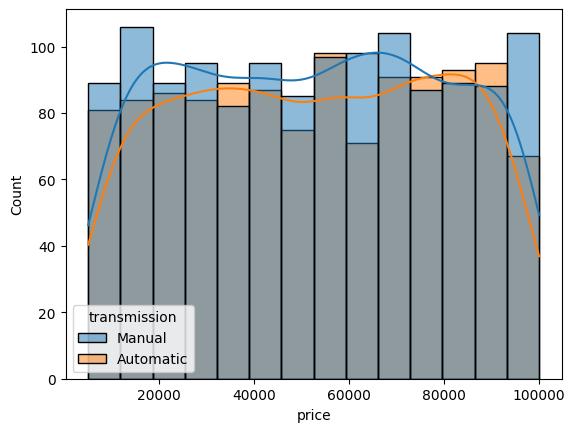

In [24]:
sns.histplot(data=df, x="price", hue="transmission", kde=True)

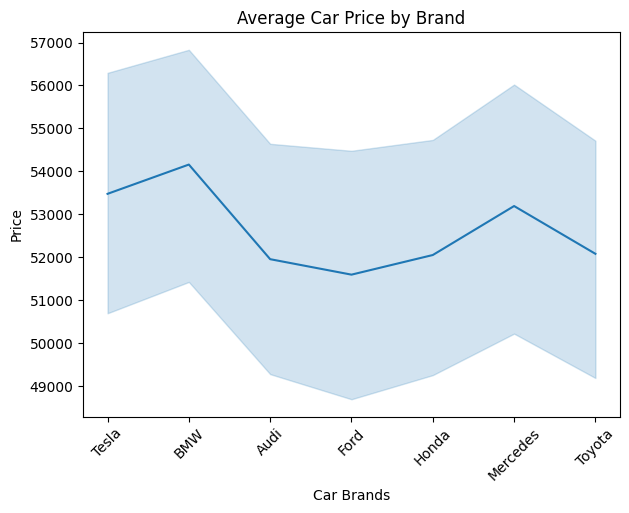

In [27]:
sns.lineplot(x = "brand", y = "price" , data = df)
plt.title("Average Car Price by Brand")
plt.xlabel("Car Brands")
plt.ylabel("Price")
plt.tight_layout()
plt.xticks(rotation = (45))
plt.show()

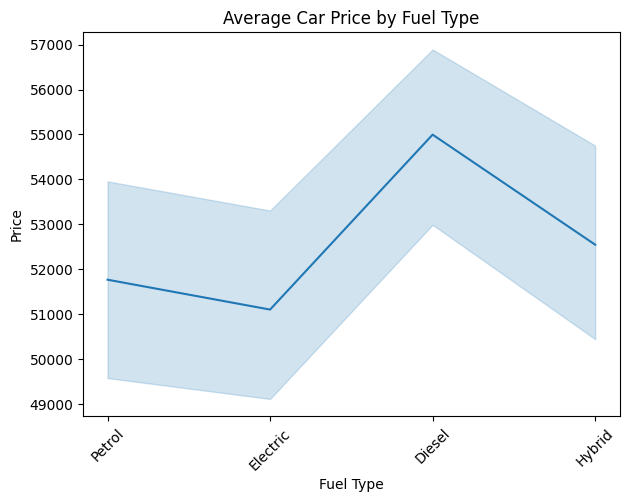

In [28]:
sns.lineplot(x = "fuel_type", y = "price" , data = df)
plt.title("Average Car Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.tight_layout()
plt.xticks(rotation = (45))
plt.show()

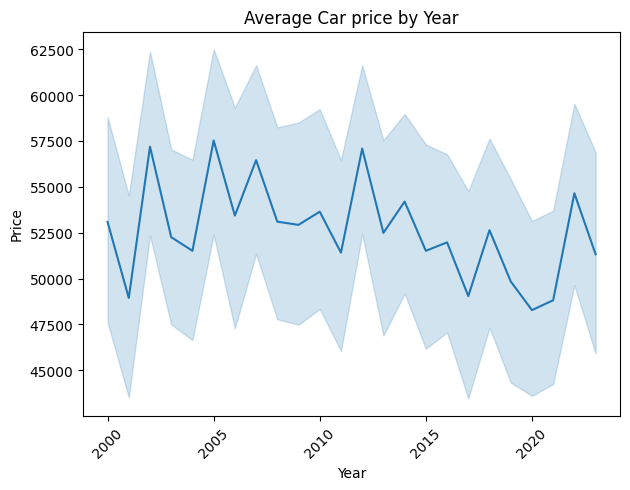

In [29]:
sns.lineplot(x = "year", y = "price" , data = df)
plt.title("Average Car price by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.tight_layout()
plt.xticks(rotation = (45))
plt.show()



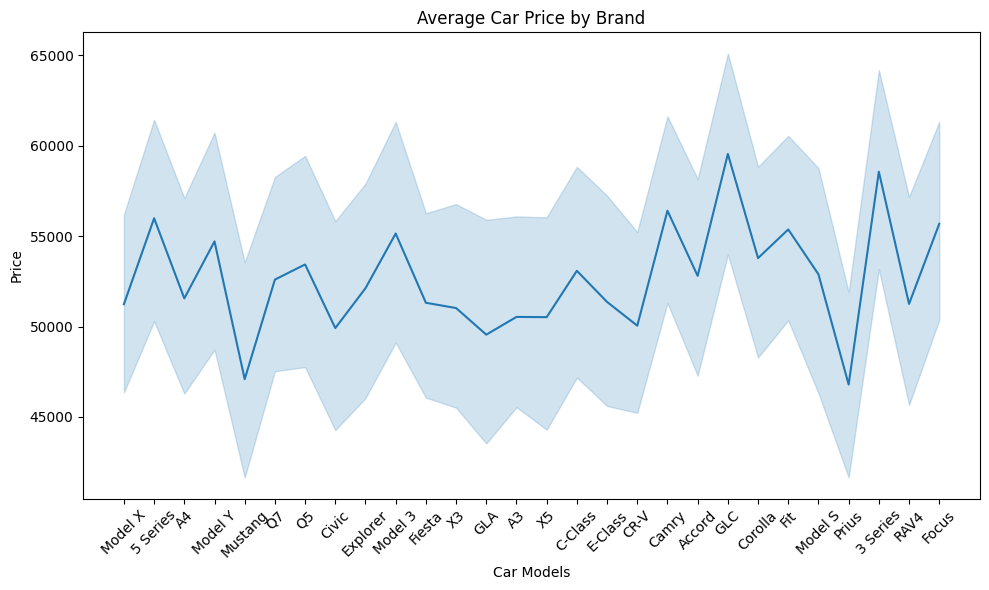

In [32]:
plt.figure(figsize=(10, 6))   # Increase width (14) or height (6) as needed

sns.lineplot(x="model", y="price", data=df)
plt.title("Average Car Price by Brand")
plt.xlabel("Car Models")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, OrdinalEncoder, StandardScaler

def pipeline(X, model):
    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    one_hot_features = X[['Brand', 'Fuel Type', 'Transmission']].columns.tolist()
    target_encode_features = X[['Model']].columns.tolist()
    ordinal_encode_features = X[['Condition']].columns.tolist()

    condition_order = [['Used', 'Like New', 'New']]

    numeric_preprocess = Pipeline(steps=[
        ("scaler", StandardScaler()),
    ])

    one_hot_preprocess = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ])

    target_encode_preprocess = Pipeline(steps=[
        ("target_encode", TargetEncoder()),
    ])

    ordinal_encode_preprocess = Pipeline(steps=[
        ("ordinal", OrdinalEncoder(categories=condition_order)),
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_preprocess, numeric_features),
        ("onehot", one_hot_preprocess, one_hot_features),
        ("target", target_encode_preprocess, target_encode_features),
        ("ordinal", ordinal_encode_preprocess, ordinal_encode_features),
    ])


    lr = model

    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('model', lr),
    ])

    return pipeline

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Price"])
y = df["Price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from flaml import AutoML
model = AutoML()

# make pipeline
pipe = pipeline(X, model)

In [16]:
pipe.fit(X_train, y_train, model__task='regression', model__time_budget=60, model__metric='r2', model__log_file_name='automl_all_features_log.txt')


[flaml.automl.logger: 11-16 12:33:08] {1752} INFO - task = regression
[flaml.automl.logger: 11-16 12:33:08] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 11-16 12:33:08] {1862} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 11-16 12:33:08] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 11-16 12:33:08] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-16 12:33:08] {2417} INFO - Estimated sufficient time budget=1070s. Estimated necessary time budget=8s.
[flaml.automl.logger: 11-16 12:33:08] {2466} INFO -  at 0.1s,	estimator lgbm's best error=0.9975,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:08] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-16 12:33:09] {2466} INFO -  at 0.2s,	estimator lgbm's best error=0.9975,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:09] {2282} I

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:09] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.9975,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:09] {2282} INFO - iteration 3, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:09] {2466} INFO -  at 0.9s,	estimator sgd's best error=4.5548,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:09] {2282} INFO - iteration 4, current learner xgboost
[flaml.automl.logger: 11-16 12:33:09] {2466} INFO -  at 1.1s,	estimator xgboost's best error=0.9981,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:09] {2282} INFO - iteration 5, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 1.4s,	estimator extra_tree's best error=1.0077,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 1.5s,	estimator lgbm's best error=0.9975,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 7, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 1.8s,	estimator rf's best error=1.0094,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 8, current learner rf
[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 2.0s,	estimator rf's best error=1.0094,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 2.1s,	estimator lgbm's best error=0.9975,	best estimator lgbm's best error=0.9975
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 11-16 12:33:10] {2466} INFO -  at 2.1s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:10] {2282} INFO - iteration 11, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:11] {2466} INFO -  at 2.4s,	estimator rf's best error=1.0094,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:11] {2282} INFO - iteration 12, current learner xgboost
[flaml.automl.logger: 11-16 12:33:11] {2466} INFO -  at 2.5s,	estimator xgboost's best error=0.9981,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:11] {2282} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 11-16 12:33:11] {2466} INFO -  at 2.6s,	estimator xgboost's best error=0.9981,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:11] {2282} INFO - iteration 14, current learner xgboost
[flaml.automl.logger: 11-16 12:33:11] {2466} INFO -  at 2.7s,	estimator xgboost's best error=0.9981,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:11] {2282} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 11-16 12:33:11] {2466} INFO -  at 2.8s,	estimator xgboost's

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:12] {2466} INFO -  at 4.1s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:12] {2282} INFO - iteration 22, current learner xgboost
[flaml.automl.logger: 11-16 12:33:13] {2466} INFO -  at 4.3s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:13] {2282} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 11-16 12:33:13] {2466} INFO -  at 4.4s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:13] {2282} INFO - iteration 24, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:13] {2466} INFO -  at 4.6s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:13] {2282} INFO - iteration 25, current learner extra_tree


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:13] {2466} INFO -  at 4.8s,	estimator extra_tree's best error=1.0077,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:13] {2282} INFO - iteration 26, current learner sgd
[flaml.automl.logger: 11-16 12:33:14] {2466} INFO -  at 5.7s,	estimator sgd's best error=4.3962,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:14] {2282} INFO - iteration 27, current learner lgbm
[flaml.automl.logger: 11-16 12:33:14] {2466} INFO -  at 5.8s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:14] {2282} INFO - iteration 28, current learner xgboost
[flaml.automl.logger: 11-16 12:33:14] {2466} INFO -  at 5.9s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:14] {2282} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.2s,	estimator extra_tree's best error=1.0062,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 30, current learner xgboost
[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.3s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.5s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 32, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.6s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.7s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 34, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 6.8s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 11-16 12:33:15] {2466} INFO -  at 7.0s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:15] {2282} INFO - iteration 36, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:16] {2466} INFO -  at 7.2s,	estimator rf's best error=1.0051,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:16] {2282} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 11-16 12:33:16] {2466} INFO -  at 7.4s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:16] {2282} INFO - iteration 38, current learner rf
[flaml.automl.logger: 11-16 12:33:16] {2466} INFO -  at 7.8s,	estimator rf's best error=1.0051,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:16] {2282} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 11-16 12:33:16] {2466} INFO -  at 8.0s,	estimator xgboost's best error=0.9973,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:16] {2282} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 11-16 12:33:16] {2466} INFO -  at 8.1s,	estimator lgbm's best error=0.99

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:17] {2466} INFO -  at 8.5s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:17] {2282} INFO - iteration 43, current learner lgbm
[flaml.automl.logger: 11-16 12:33:17] {2466} INFO -  at 8.6s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:17] {2282} INFO - iteration 44, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:17] {2466} INFO -  at 8.8s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:17] {2282} INFO - iteration 45, current learner sgd
[flaml.automl.logger: 11-16 12:33:18] {2466} INFO -  at 9.7s,	estimator sgd's best error=3.0140,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:18] {2282} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 11-16 12:33:18] {2466} INFO -  at 10.1s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:18] {2282} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.2s,	estimator lgbm's best error=0.9971,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 48, current learner extra_tree


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.5s,	estimator extra_tree's best error=1.0062,	best estimator lgbm's best error=0.9971
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.6s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 50, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.7s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 51, current learner sgd
[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.8s,	estimator sgd's best error=3.0140,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 10.9s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 53, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 11.0s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 11-16 12:33:19] {2466} INFO -  at 11.1s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:19] {2282} INFO - iteration 55, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.2s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 56, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.4s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.5s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 58, current learner lgbm
[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.6s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 59, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.7s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 60, current learner lgbm
[flaml.automl.logger: 11-16 12:33:20] {2466} INFO -  at 11.8s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:20] {2282} INFO - iteration 61, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:21] {2466} INFO -  at 12.3s,	estimator rf's best error=1.0051,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:21] {2282} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 11-16 12:33:21] {2466} INFO -  at 12.4s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:21] {2282} INFO - iteration 63, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:21] {2466} INFO -  at 12.7s,	estimator rf's best error=1.0051,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:21] {2282} INFO - iteration 64, current learner xgboost
[flaml.automl.logger: 11-16 12:33:21] {2466} INFO -  at 13.1s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:21] {2282} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 13.2s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 13.3s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 67, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 13.5s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 13.6s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 69, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 13.7s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 70, current learner rf
[flaml.automl.logger: 11-16 12:33:22] {2466} INFO -  at 14.1s,	estimator rf's best error=1.0046,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:22] {2282} INFO - iteration 71, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:23] {2466} INFO -  at 14.6s,	estimator extra_tree's best error=1.0062,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:23] {2282} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 11-16 12:33:23] {2466} INFO -  at 14.7s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:23] {2282} INFO - iteration 73, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:24] {2466} INFO -  at 15.6s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:24] {2282} INFO - iteration 74, current learner sgd
[flaml.automl.logger: 11-16 12:33:24] {2466} INFO -  at 15.7s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:24] {2282} INFO - iteration 75, current learner sgd
[flaml.automl.logger: 11-16 12:33:25] {2466} INFO -  at 16.6s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:25] {2282} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 11-16 12:33:25] {2466} INFO -  at 16.7s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:25] {2282} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 11-16 12:33:25] {2466} INFO -  at 16.8s,	estimator lgbm's best error=0.9967,	be

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:25] {2282} INFO - iteration 78, current learner sgd
[flaml.automl.logger: 11-16 12:33:26] {2466} INFO -  at 17.7s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:26] {2282} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 11-16 12:33:26] {2466} INFO -  at 17.9s,	estimator lgbm's best error=0.9967,	best estimator lgbm's best error=0.9967
[flaml.automl.logger: 11-16 12:33:26] {2282} INFO - iteration 80, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:26] {2466} INFO -  at 18.0s,	estimator lgbm's best error=0.9965,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:26] {2282} INFO - iteration 81, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:27] {2466} INFO -  at 18.4s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:27] {2282} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 11-16 12:33:27] {2466} INFO -  at 18.5s,	estimator lgbm's best error=0.9965,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:27] {2282} INFO - iteration 83, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:28] {2466} INFO -  at 19.4s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:28] {2282} INFO - iteration 84, current learner sgd
[flaml.automl.logger: 11-16 12:33:28] {2466} INFO -  at 19.8s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:28] {2282} INFO - iteration 85, current learner sgd
[flaml.automl.logger: 11-16 12:33:28] {2466} INFO -  at 19.8s,	estimator sgd's best error=1.0365,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:28] {2282} INFO - iteration 86, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:28] {2466} INFO -  at 20.1s,	estimator extra_tree's best error=1.0062,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:28] {2282} INFO - iteration 87, current learner sgd
[flaml.automl.logger: 11-16 12:33:29] {2466} INFO -  at 20.7s,	estimator sgd's best error=

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:29] {2466} INFO -  at 21.0s,	estimator lgbm's best error=0.9965,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:29] {2282} INFO - iteration 90, current learner sgd
[flaml.automl.logger: 11-16 12:33:29] {2466} INFO -  at 21.0s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:29] {2282} INFO - iteration 91, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:29] {2466} INFO -  at 21.1s,	estimator lgbm's best error=0.9965,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:29] {2282} INFO - iteration 92, current learner sgd
[flaml.automl.logger: 11-16 12:33:30] {2466} INFO -  at 21.4s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:30] {2282} INFO - iteration 93, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:30] {2466} INFO -  at 21.6s,	estimator extra_tree's best error=1.0051,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:30] {2282} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 11-16 12:33:30] {2466} INFO -  at 22.1s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:30] {2282} INFO - iteration 95, current learner lgbm
[flaml.automl.logger: 11-16 12:33:31] {2466} INFO -  at 22.2s,	estimator lgbm's 

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:31] {2466} INFO -  at 22.8s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9965
[flaml.automl.logger: 11-16 12:33:31] {2282} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 11-16 12:33:31] {2466} INFO -  at 23.0s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:31] {2282} INFO - iteration 98, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:32] {2466} INFO -  at 23.2s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:32] {2282} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 11-16 12:33:32] {2466} INFO -  at 23.4s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:32] {2282} INFO - iteration 100, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:32] {2466} INFO -  at 23.5s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:32] {2282} INFO - iteration 101, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:32] {2466} INFO -  at 23.9s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:32] {2282} INFO - iteration 102, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:33] {2466} INFO -  at 24.3s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:33] {2282} INFO - iteration 103, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:33] {2466} INFO -  at 24.5s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:33] {2282} INFO - iteration 104, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:33] {2466} INFO -  at 25.0s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:33] {2282} INFO - iteration 105, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:33] {2466} INFO -  at 25.1s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:33] {2282} INFO - iteration 106, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:34] {2466} INFO -  at 25.8s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:34] {2282} INFO - iteration 107, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:34] {2466} INFO -  at 26.0s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:34] {2282} INFO - iteration 108, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:35] {2466} INFO -  at 26.6s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:35] {2282} INFO - iteration 109, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:36] {2466} INFO -  at 27.6s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:36] {2282} INFO - iteration 110, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:36] {2466} INFO -  at 28.0s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:36] {2282} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 11-16 12:33:36] {2466} INFO -  at 28.1s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:36] {2282} INFO - iteration 112, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:37] {2466} INFO -  at 28.3s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:37] {2282} INFO - iteration 113, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:37] {2466} INFO -  at 28.7s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:37] {2282} INFO - iteration 114, current learner sgd
[flaml.automl.logger: 11-16 12:33:38] {2466} INFO -  at 29.3s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:38] {2282} INFO - iteration 115, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:38] {2466} INFO -  at 29.8s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:38] {2282} INFO - iteration 116, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:38] {2466} INFO -  at 29.9s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:38] {2282} INFO - iteration 117, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:38] {2466} INFO -  at 30.1s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:38] {2282} INFO - iteration 118, current learner sgd
[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 30.3s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 119, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 30.7s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 120, current learner sgd
[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 30.8s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 121, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 30.9s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 122, current learner sgd
[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 31.0s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 123, current learner sgd
[flaml.automl.logger: 11-16 12:33:39] {2466} INFO -  at 31.1s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:39] {2282} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 11-16 12:33:40] {2466} INFO -  at 31.2s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:40] {2282} INFO - iteration 125, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:40] {2466} INFO -  at 31.4s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:40] {2282} INFO - iteration 126, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:40] {2466} INFO -  at 31.6s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:40] {2282} INFO - iteration 127, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:40] {2466} INFO -  at 31.8s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:40] {2282} INFO - iteration 128, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:40] {2466} INFO -  at 32.1s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:40] {2282} INFO - iteration 129, current learner sgd


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:41] {2466} INFO -  at 33.1s,	estimator sgd's best error=1.0028,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:41] {2282} INFO - iteration 130, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:42] {2466} INFO -  at 33.4s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:42] {2282} INFO - iteration 131, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:42] {2466} INFO -  at 33.6s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:42] {2282} INFO - iteration 132, current learner sgd
[flaml.automl.logger: 11-16 12:33:42] {2466} INFO -  at 33.7s,	estimator sgd's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:42] {2282} INFO - iteration 133, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:43] {2466} INFO -  at 34.2s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:43] {2282} INFO - iteration 134, current learner lgbm
[flaml.automl.logger: 11-16 12:33:43] {2466} INFO -  at 34.3s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:43] {2282} INFO - iteration 135, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:43] {2466} INFO -  at 34.6s,	estimator xgboost's best error=0.9972,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:43] {2282} INFO - iteration 136, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:43] {2466} INFO -  at 34.9s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:43] {2282} INFO - iteration 137, current learner rf
[flaml.automl.logger: 11-16 12:33:44] {2466} INFO -  at 35.3s,	estimator rf's best error=1.0046,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:44] {2282} INFO - iteration 138, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:44] {2466} INFO -  at 35.5s,	estimator lgbm's best error=0.9961,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:44] {2282} INFO - iteration 139, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:44] {2466} INFO -  at 35.8s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9961
[flaml.automl.logger: 11-16 12:33:44] {2282} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 11-16 12:33:44] {2466} INFO -  at 36.0s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:44] {2282} INFO - iteration 141, current learner extra_tree


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:45] {2466} INFO -  at 36.4s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:45] {2282} INFO - iteration 142, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:45] {2466} INFO -  at 36.6s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:45] {2282} INFO - iteration 143, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:45] {2466} INFO -  at 36.9s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:45] {2282} INFO - iteration 144, current learner xgboost
[flaml.automl.logger: 11-16 12:33:46] {2466} INFO -  at 37.2s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:46] {2282} INFO - iteration 145, current learner xgboost
[flaml.automl.logger: 11-16 12:33:46] {2466} INFO -  at 37.4s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:46] {2282} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 11-16 12:33:46] {2466} INFO -  at 37.5s,	estim

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:46] {2466} INFO -  at 37.7s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:46] {2282} INFO - iteration 148, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:46] {2466} INFO -  at 37.9s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:46] {2282} INFO - iteration 149, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:47] {2466} INFO -  at 38.5s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:47] {2282} INFO - iteration 150, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:47] {2466} INFO -  at 38.6s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:47] {2282} INFO - iteration 151, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:47] {2466} INFO -  at 38.8s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:47] {2282} INFO - iteration 152, current learner xgboost


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:48] {2466} INFO -  at 39.4s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:48] {2282} INFO - iteration 153, current learner xgboost
[flaml.automl.logger: 11-16 12:33:48] {2466} INFO -  at 39.5s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:48] {2282} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 11-16 12:33:48] {2466} INFO -  at 39.6s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:48] {2282} INFO - iteration 155, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:48] {2466} INFO -  at 39.7s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:48] {2282} INFO - iteration 156, current learner extra_tree


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:48] {2466} INFO -  at 40.0s,	estimator extra_tree's best error=1.0027,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:48] {2282} INFO - iteration 157, current learner xgboost
[flaml.automl.logger: 11-16 12:33:49] {2466} INFO -  at 40.8s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:49] {2282} INFO - iteration 158, current learner lgbm


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:50] {2466} INFO -  at 41.3s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:50] {2282} INFO - iteration 159, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:50] {2466} INFO -  at 41.6s,	estimator rf's best error=1.0014,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:50] {2282} INFO - iteration 160, current learner xgboost
[flaml.automl.logger: 11-16 12:33:50] {2466} INFO -  at 41.9s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:50] {2282} INFO - iteration 161, current learner rf
[flaml.automl.logger: 11-16 12:33:51] {2466} INFO -  at 42.2s,	estimator rf's best error=1.0014,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:51] {2282} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 11-16 12:33:51] {2466} INFO -  at 42.5s,	estimator xgboost's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:51] {2282} INFO - iteration 163, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:51] {2466} INFO -  at 42.8s,	estimator extra_t

c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[flaml.automl.logger: 11-16 12:33:55] {2466} INFO -  at 46.6s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:55] {2282} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 11-16 12:33:55] {2466} INFO -  at 46.7s,	estimator lgbm's best error=0.9959,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:55] {2282} INFO - iteration 172, current learner rf


c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\avysk\Documents\UChicago\Autumn_2025\final\venv\Lib\site-packages\sklearn\utils\validation.py:2

[flaml.automl.logger: 11-16 12:33:56] {2466} INFO -  at 47.2s,	estimator rf's best error=0.9976,	best estimator lgbm's best error=0.9959
[flaml.automl.logger: 11-16 12:33:56] {2282} INFO - iteration 173, current learner xgboost
[flaml.automl.logger: 11-16 12:33:56] {2466} INFO -  at 47.5s,	estimator xgboost's best error=0.9950,	best estimator xgboost's best error=0.9950
[flaml.automl.logger: 11-16 12:33:56] {2282} INFO - iteration 174, current learner xgboost
[flaml.automl.logger: 11-16 12:33:56] {2466} INFO -  at 47.8s,	estimator xgboost's best error=0.9950,	best estimator xgboost's best error=0.9950
[flaml.automl.logger: 11-16 12:33:56] {2282} INFO - iteration 175, current learner rf
[flaml.automl.logger: 11-16 12:33:57] {2466} INFO -  at 48.4s,	estimator rf's best error=0.9976,	best estimator xgboost's best error=0.9950
[flaml.automl.logger: 11-16 12:33:57] {2282} INFO - iteration 176, current learner extra_tree
[flaml.automl.logger: 11-16 12:33:57] {2466} INFO -  at 48.7s,	estimato

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
results = {}
print(f"Best estimator: {pipe.named_steps['model'].best_estimator}")  
results['best_model_top_3_features'] = pipe.named_steps['model'].best_estimator
print(f"Best configuration: {pipe.named_steps['model'].best_config}")  
results['best_config_top_3_features'] = pipe.named_steps['model'].best_config
print(f"Best R2 on validation data: {pipe.named_steps['model'].best_loss}")

Best estimator: xgboost
Best configuration: {'n_estimators': 20, 'max_leaves': 30, 'min_child_weight': 128.0, 'learning_rate': np.float64(0.04793410166861398), 'subsample': np.float64(0.9378016548236611), 'colsample_bylevel': np.float64(0.6661728227141133), 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0013253721908274404), 'reg_lambda': np.float64(21.276768628139422)}
Best R2 on validation data: 0.9922913821936408
